#Exploratory Data: Artworks 
##Levi Lowther
##2/20/23

##1: Import what is necessary and create dataframe

In [185]:
import pandas as pd

import matplotlib

import numpy as np

import statistics as stats

artwork_df = pd.read_csv('artworks.csv', index_col=0)

##2: Clean Dataset
###Rename Columns
###columns that won't be necessary

In [186]:
artwork_df.rename(columns={'Artist': 'Artist Name', 'Date': 'Date of Artwork',
                           'Circumference (cm)': 'Circumference', 'Depth (cm)': 'Depth',
                           'Diameter (cm)': 'Diameter' , 'Height (cm)': 'Height',
                           'Length (cm)': 'Length', 'Weight (kg)': 'Weight', 
                           'Width (cm)': 'Width', 'Seat Height (cm)': 'Seat Height',
                           'Duration (sec.)': 'Duration'}, inplace=True)



In [187]:
#remove columns that won't be needed
artwork_df.drop(["ConstituentID", "BeginDate", "EndDate", "ArtistBio", "Medium", "Dimensions", "CreditLine", "AccessionNumber", "Department", 
                "DateAcquired", "Cataloged", "URL", "Seat Height", "ObjectID", "Classification", "Nationality", "ThumbnailURL"], axis = 1, inplace = True)


##3: Add new column to calculate area of artworks
###Show Head and tail

In [188]:
artwork_df['Area'] = artwork_df['Height'] * artwork_df['Width']

In [189]:
artwork_df.head()

,Artist Name,Gender,Date of Artwork,Circumference,Depth,Diameter,Height,Length,Weight,Width,Duration,Area
Title,,,,,,,,,,,,
"Ferdinandsbrücke Project, Vienna, Austria, Elevation, preliminary version",Otto Wagner,(Male),1896,NaN,NaN,NaN,48.60,NaN,NaN,168.90,NaN,8208.54
"City of Music, National Superior Conservatory of Music and Dance, Paris, France, View from interior courtyard",Christian de Portzamparc,(Male),1987,NaN,NaN,NaN,40.64,NaN,NaN,29.85,NaN,1212.91
"Villa near Vienna Project, Outside Vienna, Austria, Elevation",Emil Hoppe,(Male),1903,NaN,NaN,NaN,34.30,NaN,NaN,31.80,NaN,1090.74
"The Manhattan Transcripts Project, New York, New York, Introductory panel to Episode 1: The Park",Bernard Tschumi,(Male),1980,NaN,NaN,NaN,50.80,NaN,NaN,50.80,NaN,2580.64
"Villa, project, outside Vienna, Austria, Exterior perspective",Emil Hoppe,(Male),1903,NaN,NaN,NaN,38.40,NaN,NaN,19.10,NaN,733.44


In [190]:
artwork_df.tail()

,Artist Name,Gender,Date of Artwork,Circumference,Depth,Diameter,Height,Length,Weight,Width,Duration,Area
Title,,,,,,,,,,,,
An Episode in the Life of a Landscape Painter from The Valise,NaN,NaN,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incense Sweaters & Ice (Installation),Martine Syms,(),2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500.0,NaN
Just For You,Ken Friedman,(Male),1967,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0
Marey and Demeny Chronophotographs,NaN,NaN,1892–1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420.0,NaN
Four Saints in Three Acts,Julien Levy,(Male),1934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##4: Describe the Area

In [191]:
(artwork_df.Area).describe()

count    1.12e+05
mean     2.79e+03
std      3.30e+04
min      0.00e+00
25%      3.35e+02
50%      7.05e+02
75%      1.90e+03
max      1.00e+07
Name: Area, dtype: float64

##5: Generate a List
###use stats and numpy to anaylize Area data

In [192]:
pd.set_option('display.precision', 2) #display numerical values with 2 decimal places


In [193]:
artwork_area = artwork_df['Area'].values.tolist() #pull width column into a list

non_zero_area = list(filter(lambda x: x != 0, artwork_area)) #remove zero values from list

len(non_zero_area) #determine how many values are present

129813

In [194]:
max(non_zero_area) #determine max width in cm

10033711.2

In [195]:
min(non_zero_area) #determine min width in cm

0.3

In [196]:
np.nanmean(non_zero_area) #mean of width excluding nan values

2851.618296491223

In [197]:
np.nanmedian(non_zero_area) #median of width excluding nan values 

720.5099999999999

In [198]:
stats.mode(non_zero_area) #width that occured the most

451.6138064541245

In [199]:
np.nanstd(non_zero_area) #standard deviation of width excluding nan values

33347.83405020231

In [200]:
np.nanvar(non_zero_area) #variance of width excluding nan values

1112078035.839833

##6: Define a fucntion to cube and map to Area list 


In [201]:
def cube(x):
    return x ** 3 #cubeism in data! who knew! 

In [202]:
cubed_area = list(map(cube, non_zero_area))

In [203]:
np.nanmean(cubed_area)

9338278103252672.0

##7: Show Histogram of the Artwork dataframe 

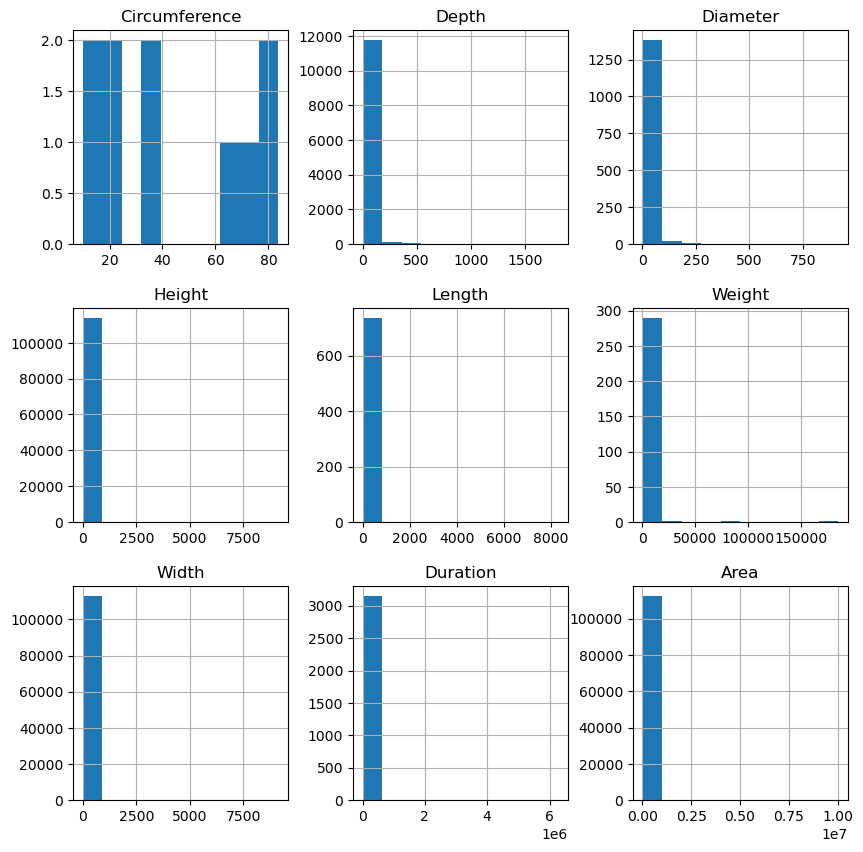

In [204]:
histogram = artwork_df.hist(figsize=(10,10))